# Analysis TItanic Dataset
In this Project we will be analyzing the Titanic Dataset to predict the survival of the passengers.
Here are the steps we will be taking:

## 1. Data Loading and Exploration
### - Summary statistics
### - Missing value analysis
### - Distribution analysis
### - Correlation analysis

## 2. Data Cleaning
### - Handle missing values
### - Deal with outliers
### - Fix inconsistent categories
### - Address data quality issues

## 3. Exploratory Data Analysis (EDA)
### - Univariate Analysis
### - Bivariate Analysis
### - Multivariate Analysis

## 4. Feature Engineering
### - Create age groups
### - Develop family size features
### - Extract title information
### - Create fare categories
### - Develop cabin location features

## 5. Model Building
### - Start with simple models
### - Progress to more complex models
### - Compare different approaches
### - Ensemble best performers

## 6. Model Evaluation
### - Evaluate model performance
### - Interpret model results
### - Compare different models

## 7. Conclusion


## Questions 
### 1. General Question
- What were the ship's evacuation protocols (women and children first)?

### 2. Data Understanding
- What was the age distribution?
- What was the average age of passengers?
- Did age affect survival rates?
- What was the gender ratio?
- Did gender affect survival rates?
- How many passengers were in each class?
- What was the average fare paid by passengers?
- Did fare affect survival rates?
- Where did most passengers embark from?
- How many families were traveling together?
- Did family size affect survival rates?
- Were there many solo travelers?

### 3. Data Quality Questions
- How much missing data is there?
- Are there any outliers?
- Which features have missing values?
- Are there any unusual patterns in the data? Is the data imbalanced?

### 4. Initial Data Analysis
- Overall survival rate
- Survival rate by gender
- Survival rate by class
- Survival rate by age group
- Survival rate by port of embarkation
- Which features strongly correlate with survival?
- Are there correlations between features?
- What indirect relationships might exist?

### 5. Feature Engineering Considerations

#### Title Analysis
- Can we extract titles from names?
- Do different titles indicate social status?

#### Family Information
- Can we create family groups?
- Can we identify traveling groups?
- Should we combine SibSp and Parch?

#### Location Information
- What can cabin numbers tell us?
- Does deck location matter?
- Are there patterns in ticket numbers?

### 5. Modeling Strategy Questions

#### Model Selection
- What type of problem is this (binary classification)?
- Which models work well with categorical data?
- How do we handle mixed numeric and categorical features?

#### Validation Strategy
- How should we split the data?
- What cross-validation approach is appropriate?
- What metrics should we use to evaluate performance?

### 6. Feature Selection Questions
- Which features are most important?
- Are there any redundant features we can remove?
- How do we handle categorical variables?
- Should we use feature scaling?

### 7. Model Optimization Qustions
- What hyperparameters should we tune?
- How can we reduce overfitting?
- How can we reduce bias?
- Should we use ensemble methods?
- How do we handle class imbalance?

### 8. Interpretation Questions
- Which features are most important?
- What patterns did the model discover?
- Are the results historically sensible?
- What insights can we draw about survival factors?


In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
training = pd.read_csv('titanic_data/train.csv')
testing = pd.read_csv('titanic_data/test.csv')



In [4]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

From here on we know that the dataset has 891 rows and 12 columns.
Here are the columns:

- PassengerId

- Survived

- Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- Name

- Sex

- Age: fractional if less than 1. If the age is estimated, is it in the form of xx.5

- SibSp: Number of Siblings/Spouses Aboard

- Parch: Number of Parents/Children Aboard

- Ticket

- Fare

- Cabin

- Embarked: Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

In [15]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age, Cabin, Embarked has missing values.
- SibSp max is 8, Parch max is 6. Investigate these values!
- Fare has a max of 512.3292, meanwhile the minimal value is 0. Investigate this value!

In [34]:
# Summary of Categorical Variables (excluding Names)
print("=== Categorical Variables ===")
categorical_cols = training.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Name']

for col in categorical_cols:
    print(f"\n{col} value counts:")
#    print(training[col].value_counts())
#    print(f"Percentage:")
#    print((training[col].value_counts(normalize=True) * 100).round(2), '%')
    print(f"Number of unique values: {training[col].nunique()}")

=== Categorical Variables ===

Sex value counts:
Number of unique values: 2

Ticket value counts:
Number of unique values: 681

Cabin value counts:
Number of unique values: 147

Embarked value counts:
Number of unique values: 3


!! REMINDER
- Age, Cabin, Embarked has missing values.
- Ticket has 681 unique values, and non missing values. People with the same ticket number are likely to be family members.
- Cabin has only 204 entries. And 147 unique values. Some people have the same cabin number.
- Embarked has 3 unique values, and 2 missing values. What happened to these passengers?


In [35]:
# 3. Missing Values Analysis
print("=== Missing Values Analysis ===")
missing_data = pd.DataFrame({
    'Total Missing': training.isnull().sum(),
    'Percentage Missing': (training.isnull().sum() / len(training) * 100).round(2)
})
print(missing_data[missing_data['Total Missing'] > 0].sort_values('Percentage Missing', ascending=False))

=== Missing Values Analysis ===
          Total Missing  Percentage Missing
Cabin               687               77.10
Age                 177               19.87
Embarked              2                0.22


In [36]:
# Survival Rate Analysis
print("=== Survival Analysis ===")

# Overall Survival Statistics
total_passengers = len(training)
survivors = training['Survived'].sum()
deaths = total_passengers - survivors

print(f"Total Passengers: {total_passengers}")
print(f"Total Survivors: {survivors} ({(survivors/total_passengers * 100).round(2)}%)")
print(f"Total Deaths: {deaths} ({(deaths/total_passengers * 100).round(2)}%)")


=== Survival Analysis ===
Total Passengers: 891
Total Survivors: 342 (38.38%)
Total Deaths: 549 (61.62%)


In [37]:
# Survival by Gender
print("\n=== Survival by Gender ===")
gender_survival = pd.crosstab(training['Sex'], training['Survived'])
gender_survival.columns = ['Died', 'Survived']
gender_survival['Total'] = gender_survival['Died'] + gender_survival['Survived']
gender_survival['Survival Rate'] = (gender_survival['Survived'] / gender_survival['Total'] * 100).round(2)
print(gender_survival)


=== Survival by Gender ===
        Died  Survived  Total  Survival Rate
Sex                                         
female    81       233    314          74.20
male     468       109    577          18.89


In [38]:
# Survival by Class
print("\n=== Survival by Passenger Class ===")
class_survival = pd.crosstab(training['Pclass'], training['Survived'])
class_survival.columns = ['Died', 'Survived']
class_survival['Total'] = class_survival['Died'] + class_survival['Survived']
class_survival['Survival Rate'] = (class_survival['Survived'] / class_survival['Total'] * 100).round(2)
print(class_survival)


=== Survival by Passenger Class ===
        Died  Survived  Total  Survival Rate
Pclass                                      
1         80       136    216          62.96
2         97        87    184          47.28
3        372       119    491          24.24


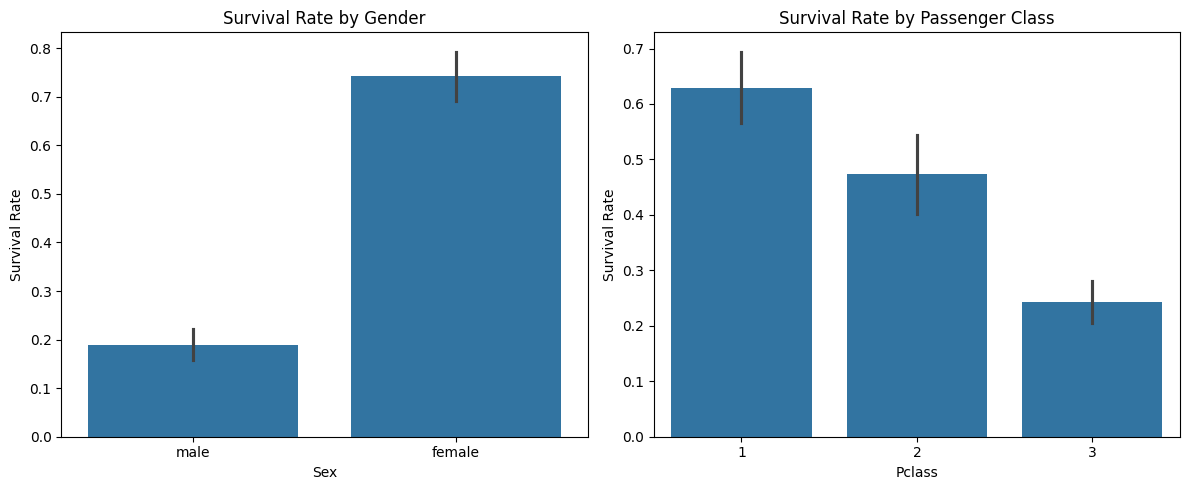

In [39]:
# Optional: Add visualization
plt.figure(figsize=(12, 5))

# Gender survival plot
plt.subplot(1, 2, 1)
sns.barplot(data=training, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

# Class survival plot
plt.subplot(1, 2, 2)
sns.barplot(data=training, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

In [8]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
